In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
dataset = pd.read_csv("E:\\python\\New folder (3)\\stockmarket\\AMZN.csv")
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
0,16.578501,16.650000,16.282499,16.375000,16.375000,64244000,AMAZON
1,16.382500,16.775000,16.375000,16.620501,16.620501,73268000,AMAZON
2,16.799999,17.035999,16.694000,16.760000,16.760000,88736000,AMAZON
3,16.777500,16.777500,16.233000,16.295500,16.295500,85526000,AMAZON
4,16.352501,16.465000,16.176500,16.313499,16.313499,55296000,AMAZON


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2518 non-null   float64
 1   High          2518 non-null   float64
 2   Low           2518 non-null   float64
 3   Close         2518 non-null   float64
 4   Adj Close     2518 non-null   float64
 5   Volume        2518 non-null   int64  
 6   company_name  2518 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [4]:
data = dataset[0:2000]
testdata = dataset[2000:2518]
data

,Open,High,Low,Close,Adj Close,Volume,company_name
0,16.578501,16.650000,16.282499,16.375000,16.375000,64244000,AMAZON
1,16.382500,16.775000,16.375000,16.620501,16.620501,73268000,AMAZON
2,16.799999,17.035999,16.694000,16.760000,16.760000,88736000,AMAZON
3,16.777500,16.777500,16.233000,16.295500,16.295500,85526000,AMAZON
4,16.352501,16.465000,16.176500,16.313499,16.313499,55296000,AMAZON
...,...,...,...,...,...,...,...
1995,111.250000,112.642502,107.170998,108.859001,108.859001,105434000,AMAZON
1996,108.103500,110.155998,104.428497,105.372002,105.372002,109704000,AMAZON
1997,102.750000,110.780502,102.405502,106.930496,106.930496,132026000,AMAZON
1998,109.069000,113.183998,107.800003,113.055000,113.055000,93684000,AMAZON


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

C:\Users\aksha\AppData\Local\Temp\ipykernel_7204\668710601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Close"]=pd.to_numeric(data.Close,errors='coerce')


In [6]:
trainData

array([[ 16.375     ],
       [ 16.62050056],
       [ 16.76000023],
       ...,
       [106.93049622],
       [113.05500031],
       [110.8105011 ]])

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2000, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,len(trainData)): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1940, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
61/61 - 30s - loss: 0.0129 - 30s/epoch - 485ms/step
Epoch 2/20
61/61 - 11s - loss: 0.0033 - 11s/epoch - 181ms/step
Epoch 3/20
61/61 - 11s - loss: 0.0030 - 11s/epoch - 177ms/step
Epoch 4/20
61/61 - 11s - loss: 0.0026 - 11s/epoch - 183ms/step
Epoch 5/20
61/61 - 11s - loss: 0.0027 - 11s/epoch - 179ms/step
Epoch 6/20
61/61 - 12s - loss: 0.0028 - 12s/epoch - 195ms/step
Epoch 7/20
61/61 - 11s - loss: 0.0025 - 11s/epoch - 185ms/step
Epoch 8/20
61/61 - 11s - loss: 0.0023 - 11s/epoch - 186ms/step
Epoch 9/20
61/61 - 11s - loss: 0.0020 - 11s/epoch - 186ms/step
Epoch 10/20
61/61 - 12s - loss: 0.0019 - 12s/epoch - 197ms/step
Epoch 11/20
61/61 - 11s - loss: 0.0019 - 11s/epoch - 178ms/step
Epoch 12/20
61/61 - 11s - loss: 0.0018 - 11s/epoch - 184ms/step
Epoch 13/20
61/61 - 12s - loss: 0.0020 - 12s/epoch - 197ms/step
Epoch 14/20
61/61 - 11s - loss: 0.0019 - 11s/epoch - 183ms/step
Epoch 15/20
61/61 - 11s - loss: 0.0019 - 11s/epoch - 187ms/step
Epoch 16/20
61/61 - 11s - loss: 0.0017 - 11s/epoc

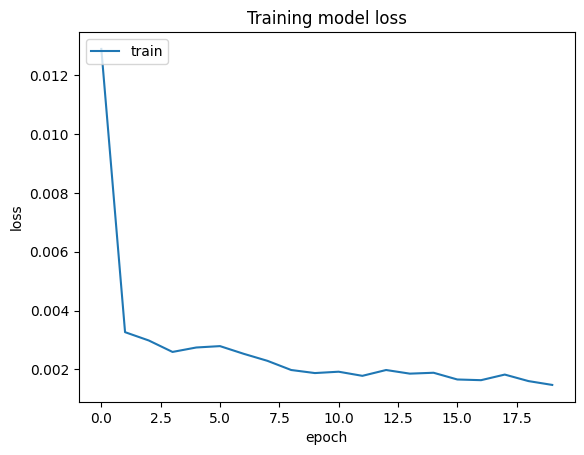

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData=dataset[2000:2518]
testData

,Open,High,Low,Close,Adj Close,Volume,company_name
2000,113.275002,115.800003,111.276497,115.368500,115.368500,76448000,AMAZON
2001,111.439499,112.852997,106.249001,107.112503,107.112503,108380000,AMAZON
2002,106.280502,110.033997,106.193001,107.319000,107.319000,88142000,AMAZON
2003,109.568497,109.898003,105.009499,107.591003,107.591003,99500000,AMAZON
2004,108.460999,108.819000,103.949997,107.556999,107.556999,107798000,AMAZON
...,...,...,...,...,...,...,...
2513,177.699997,178.699997,175.919998,178.339996,178.339996,30786600,AMAZON
2514,177.639999,179.820007,176.440002,179.339996,179.339996,27198400,AMAZON
2515,180.100006,181.500000,178.750000,181.279999,181.279999,32116400,AMAZON
2516,181.750000,185.000000,181.490005,185.000000,185.000000,31371200,AMAZON


In [14]:

testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

C:\Users\aksha\AppData\Local\Temp\ipykernel_7204\3990921063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')


(458, 60, 1)

In [15]:
y_pred = model.predict(X_test)
y_pred

15/15 [==============================] - 6s 114ms/step


array([[0.71140105],
       [0.71689796],
       [0.72093004],
       [0.7241011 ],
       [0.7264544 ],
       [0.7279927 ],
       [0.72822016],
       [0.72625524],
       [0.7219217 ],
       [0.7157087 ],
       [0.7089264 ],
       [0.70191425],
       [0.6947989 ],
       [0.68766636],
       [0.6804952 ],
       [0.67358667],
       [0.66729265],
       [0.6617462 ],
       [0.6574727 ],
       [0.6548584 ],
       [0.6544252 ],
       [0.6566703 ],
       [0.66020465],
       [0.6637856 ],
       [0.66627574],
       [0.666743  ],
       [0.6650778 ],
       [0.6613745 ],
       [0.65562344],
       [0.6480434 ],
       [0.63877285],
       [0.6284875 ],
       [0.61797374],
       [0.6084605 ],
       [0.6004816 ],
       [0.5939898 ],
       [0.58914965],
       [0.58666444],
       [0.5868313 ],
       [0.5893302 ],
       [0.5927303 ],
       [0.59560686],
       [0.59689844],
       [0.5962979 ],
       [0.59398526],
       [0.5897382 ],
       [0.58453983],
       [0.579

In [16]:
predicted_price = sc.inverse_transform(y_pred)

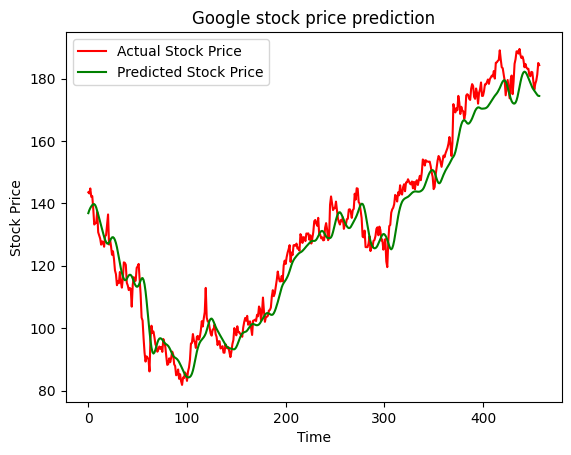

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
model2 = Sequential()

model2.add(LSTM(units=256, return_sequences = True, input_shape =(X_train.shape[1],1)))
model2.add(Dropout(0.2))

model2.add(LSTM(units=128, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=64, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=32, return_sequences = False))
model2.add(Dropout(0.2))

model2.add(Dense(units =1))
model2.compile(optimizer='adam',loss="mean_squared_error")

In [19]:
hist2 = model2.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose=2)

Epoch 1/30
61/61 - 33s - loss: 0.0126 - 33s/epoch - 548ms/step
Epoch 2/30
61/61 - 19s - loss: 0.0043 - 19s/epoch - 318ms/step
Epoch 3/30
61/61 - 20s - loss: 0.0042 - 20s/epoch - 320ms/step
Epoch 4/30
61/61 - 20s - loss: 0.0041 - 20s/epoch - 329ms/step
Epoch 5/30
61/61 - 19s - loss: 0.0035 - 19s/epoch - 315ms/step
Epoch 6/30
61/61 - 13s - loss: 0.0036 - 13s/epoch - 209ms/step
Epoch 7/30
61/61 - 17s - loss: 0.0035 - 17s/epoch - 286ms/step
Epoch 8/30
61/61 - 20s - loss: 0.0033 - 20s/epoch - 336ms/step
Epoch 9/30
61/61 - 20s - loss: 0.0036 - 20s/epoch - 332ms/step
Epoch 10/30
61/61 - 20s - loss: 0.0028 - 20s/epoch - 329ms/step
Epoch 11/30
61/61 - 20s - loss: 0.0028 - 20s/epoch - 326ms/step
Epoch 12/30
61/61 - 21s - loss: 0.0028 - 21s/epoch - 338ms/step
Epoch 13/30
61/61 - 19s - loss: 0.0025 - 19s/epoch - 319ms/step
Epoch 14/30
61/61 - 20s - loss: 0.0024 - 20s/epoch - 335ms/step
Epoch 15/30
61/61 - 20s - loss: 0.0025 - 20s/epoch - 331ms/step
Epoch 16/30
61/61 - 19s - loss: 0.0026 - 19s/epoc

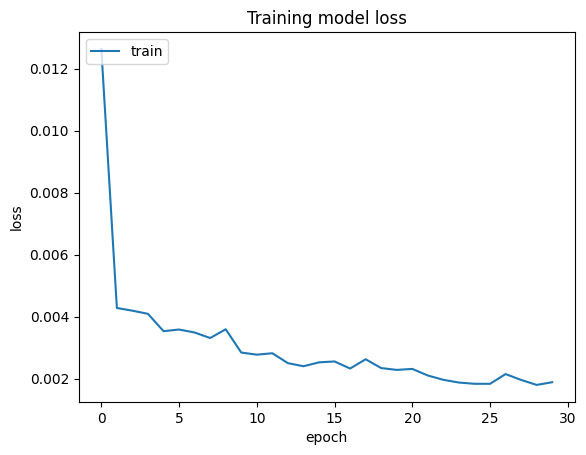

In [20]:
plt.plot(hist2.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
y_pred2 = model2.predict(X_test)
y_pred2

15/15 [==============================] - 5s 141ms/step


array([[0.738325  ],
       [0.73546016],
       [0.73506975],
       [0.73806006],
       [0.74295664],
       [0.7477299 ],
       [0.74968433],
       [0.74625504],
       [0.73754513],
       [0.7259094 ],
       [0.71551514],
       [0.70778644],
       [0.70249313],
       [0.69857347],
       [0.69463336],
       [0.69036233],
       [0.6861264 ],
       [0.6821891 ],
       [0.6797948 ],
       [0.67985415],
       [0.68331224],
       [0.6907729 ],
       [0.6984068 ],
       [0.7028966 ],
       [0.70222414],
       [0.6959132 ],
       [0.68584496],
       [0.67426777],
       [0.66247725],
       [0.65126836],
       [0.640469  ],
       [0.6305581 ],
       [0.6221376 ],
       [0.6167223 ],
       [0.61430603],
       [0.6135107 ],
       [0.6136379 ],
       [0.61570346],
       [0.62026787],
       [0.62659997],
       [0.6315735 ],
       [0.63248324],
       [0.6282432 ],
       [0.6200493 ],
       [0.610247  ],
       [0.5998193 ],
       [0.5913645 ],
       [0.587

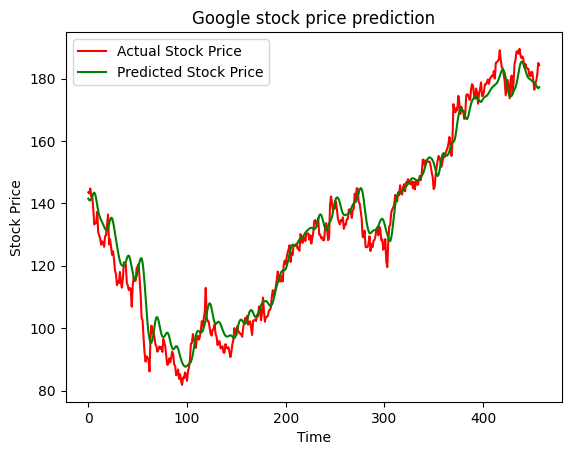

In [22]:
predicted_price2 = sc.inverse_transform(y_pred2)
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price2, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()